# Loan Application Status Prediction

In [1]:
!pip install lightgbm

In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Load Dataset
df= pd.read_csv('loan_prediction.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
print('Dataset have ',df.shape[0],' Rows and ',df.shape[1],' Columns')

Dataset have  614  Rows and  13  Columns


In [8]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0



Null Value check

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Null % check
round((df.isnull().sum()/df.shape[0])*100,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [13]:
df['Loan_Amount_Term'].nunique()

10

In [14]:
df['Dependents'].nunique()

4

In [15]:
df['LoanAmount'].nunique()

203

In [16]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

In [18]:
# filling above columns null values with mode
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [23]:
df.shape


(614, 12)

In [24]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We can see there is big difference between 75% and max , means there must be outliers in data

In [25]:
plt.figure(figsize=(18,7))
sns.heatmap(df.isnull())

NameError: name 'plt' is not defined

In [26]:
for i in df.columns[1:]:
    print( i ,'have unique values = ',df[i].unique(),'\n')

Married have unique values =  ['No' 'Yes'] 

Dependents have unique values =  ['0' '1' '2' '3+'] 

Education have unique values =  ['Graduate' 'Not Graduate'] 

Self_Employed have unique values =  ['No' 'Yes'] 

ApplicantIncome have unique values =  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# EDA
Univarient Analysis

In [25]:
import matplotlib.pyplot as plt

In [26]:
dfcorr=df.corr()

<Axes: >

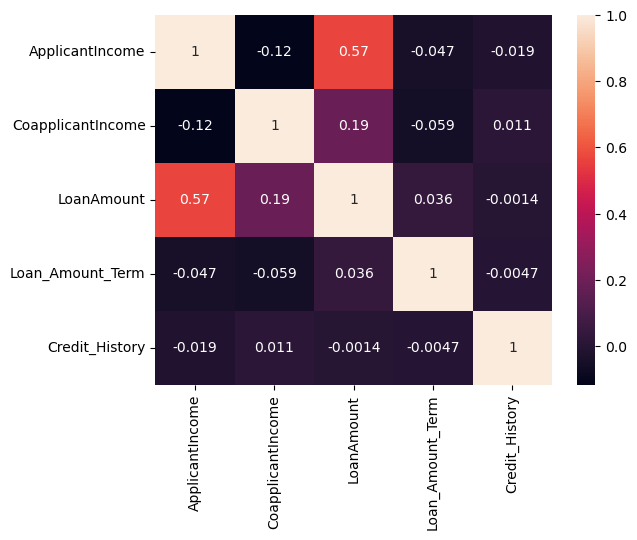

In [27]:
sns.heatmap(dfcorr,annot=True)

We can not notice LoanAmount is correlated with ApplicantIncome

all the other featurs are negatively correlated with each other



In [28]:
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


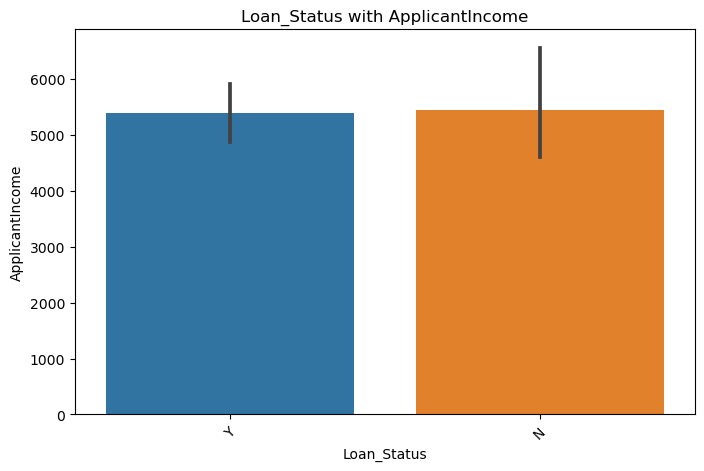

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

Chances are equal it doesn't matter with ApplicantIncome

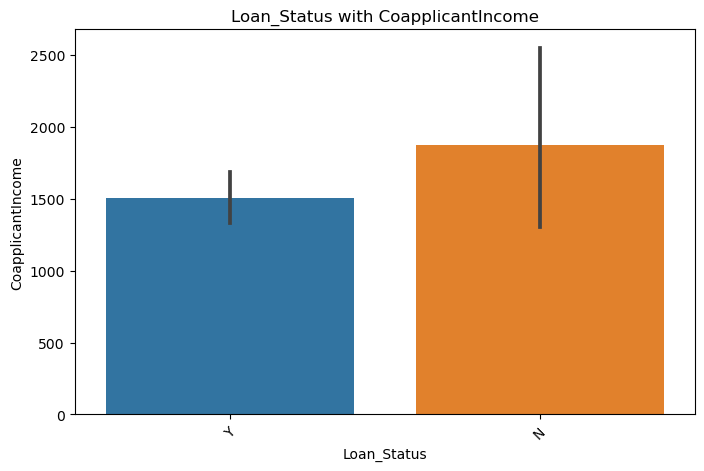

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

Here we notice some interesting figure there are chances not to be approved donts matter if CoapplicantIncome is high might be thats depends on all other figutres

<Axes: xlabel='Property_Area', ylabel='count'>

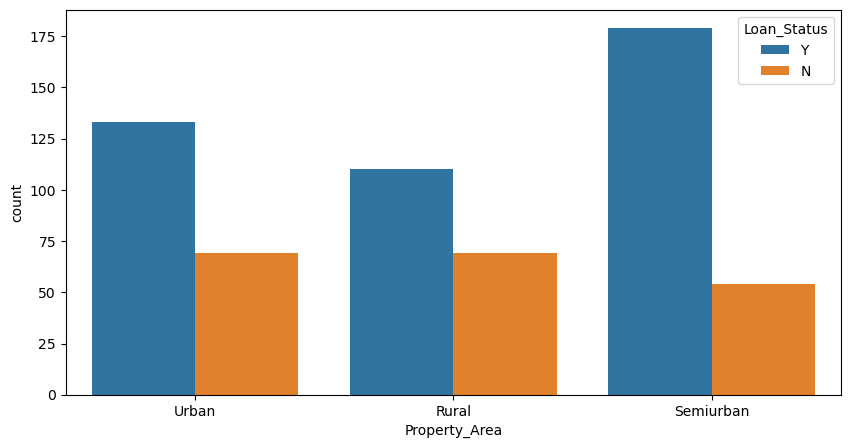

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

People those are from Urban area having 50-50 chances of approval depends and other parameters as well

In RuralProperty_area not approval chances are increasing

In Semiurban area there are high chances to get approval

<Axes: xlabel='Credit_History', ylabel='count'>

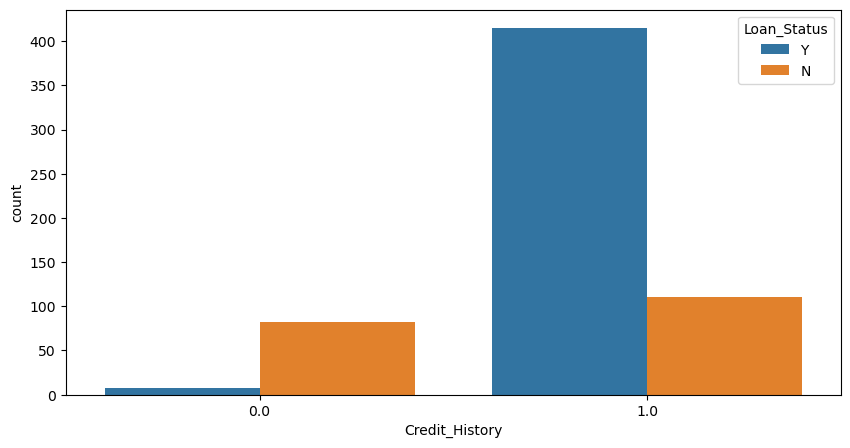

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

Here we have the logical figure most of the people those are not getting approval, not having credit hsitory

the people those having credit history, most of them getting approval

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

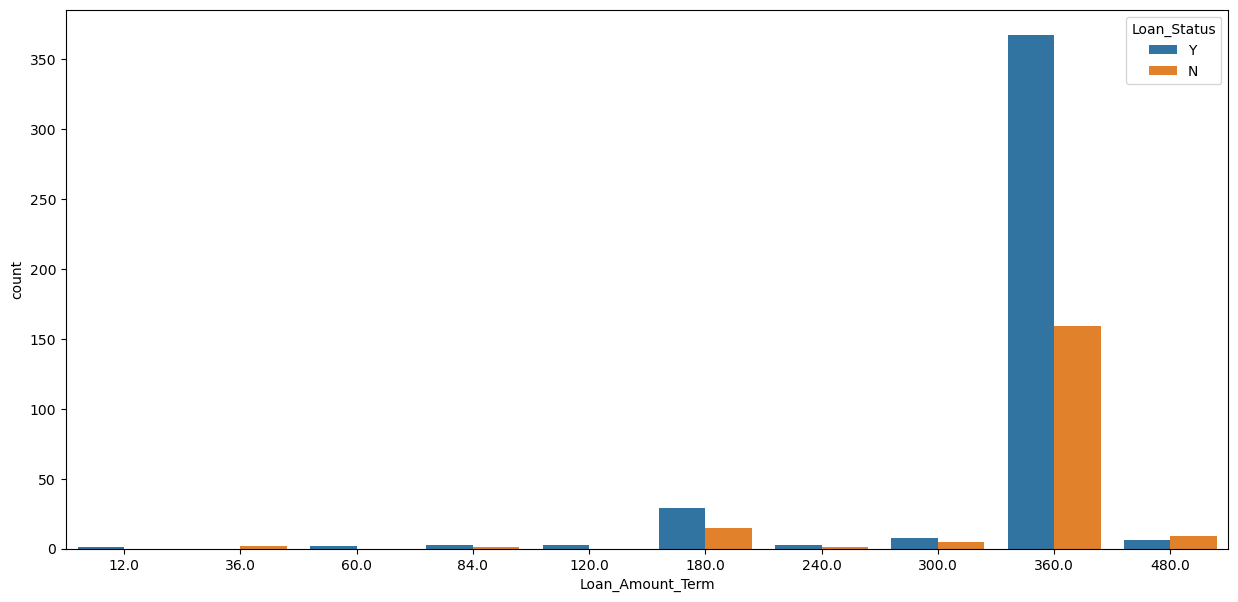

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved

People those are taking loan for 480 months, most of them are not getting approval

<Axes: xlabel='Self_Employed', ylabel='count'>

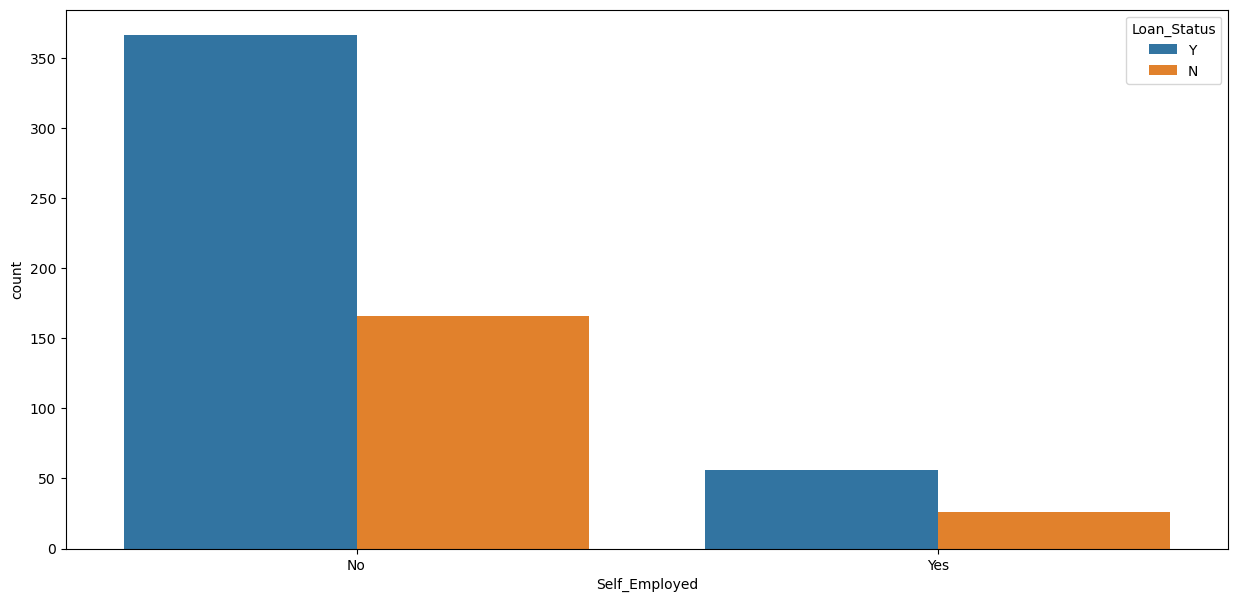

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In self_employed we see there around 50% of diffrence between approved and not approved people

<Axes: xlabel='Education', ylabel='count'>

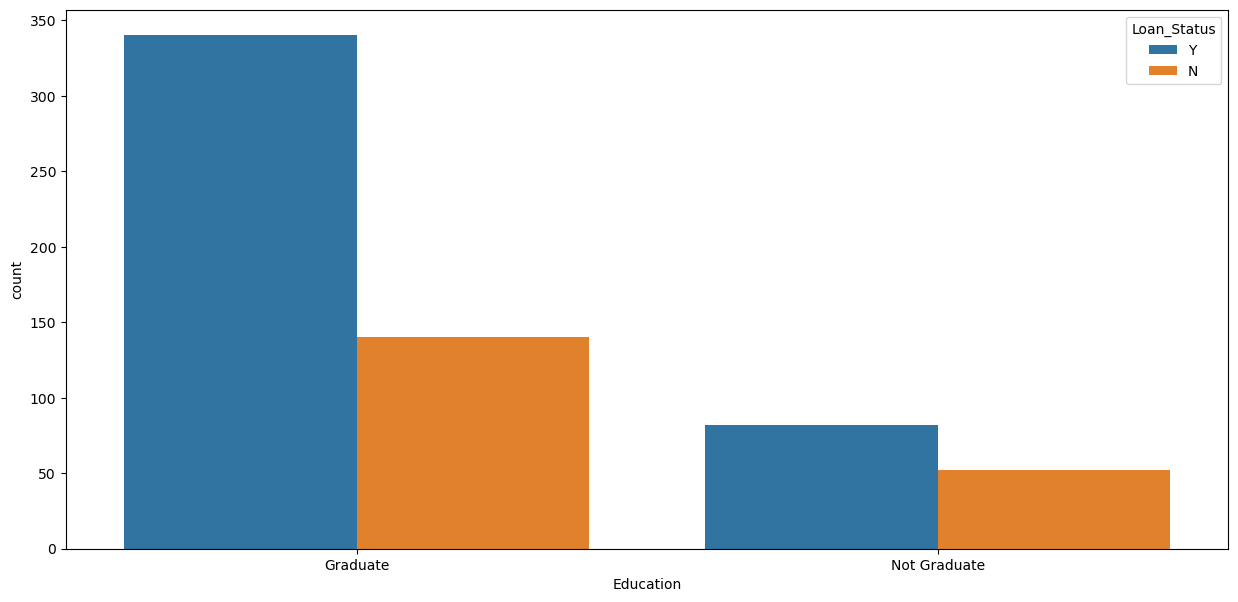

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Loan_Status',data=df)

In Graduate categ. we have around 350 approved loan and around 150 not approved

plt.figure(figsize=(15,7))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

# We can notice people those are not having dependents are getting chances of Loan approval

when dependents numbers are 3+ there is less chances of approval

In [36]:
#Using LabelEncoder for convering categorical to numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


All columns are converted into numerical now

# Skewness handling

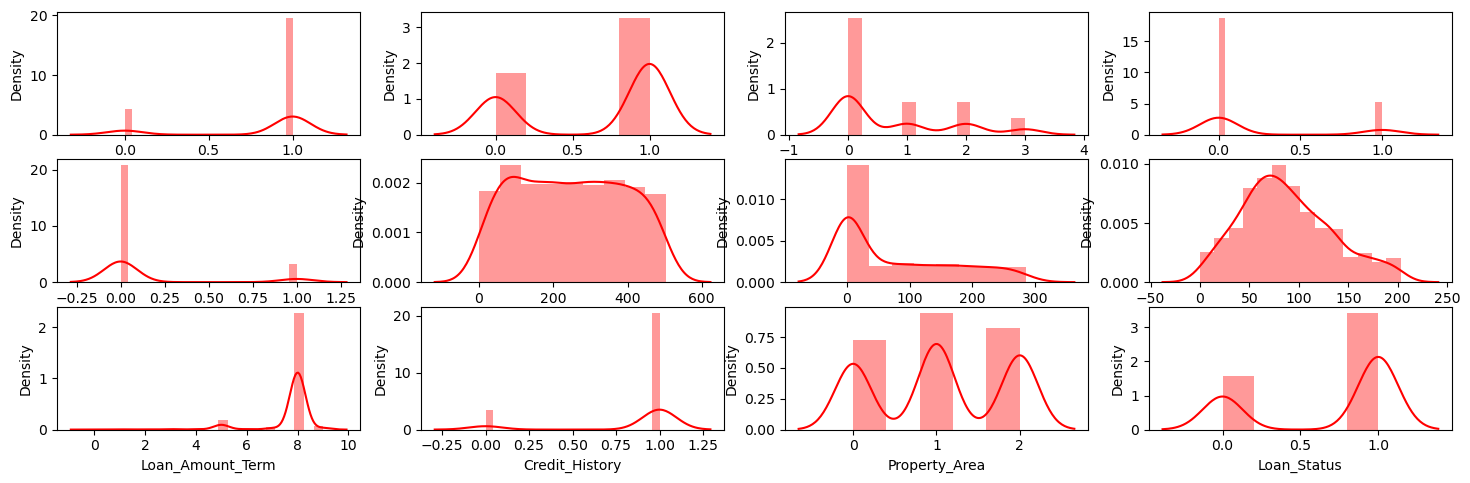

In [40]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [41]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [42]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

# Checking Outliers

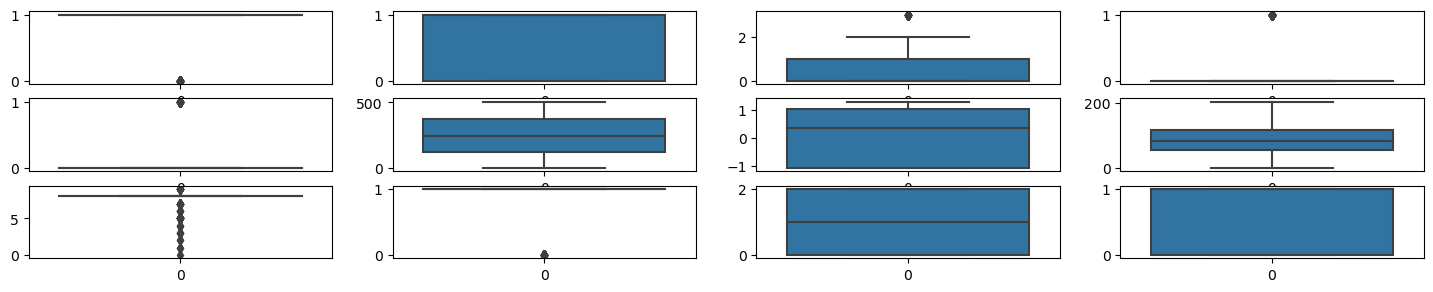

In [43]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Only some of columns seems having outliers after skewness removed

# outliers removal
zscore

In [44]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [45]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (602, 12)


# IQR

In [46]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

3.0

In [47]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(206, 12)


# Dividing data into X and Y

In [48]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [49]:
x.shape

(614, 11)

In [50]:
y.shape

(614,)

# scaling X values


In [51]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [52]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [53]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.248100,0.218241,0.133550,0.490312,0.456480,0.432118,0.851972,0.855049,0.518730
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.284797,0.425818,0.224976,0.123247,0.352339,0.393741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.238591,0.000000,0.262315,0.888889,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.485119,0.608260,0.403941,0.888889,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.733631,0.883545,0.575123,0.888889,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled

# Imbalanced learn
Using OverSamling_BorderlineSMOTE

<Axes: xlabel='Loan_Status', ylabel='count'>

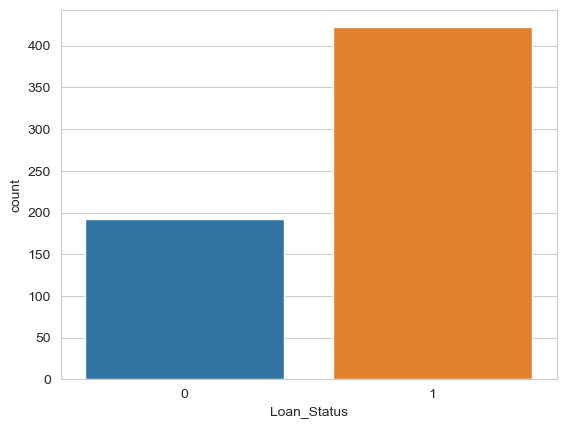

In [54]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

We can see here Data is not fully balance but we'll treat the imbalace.

we have around 200 in yes and around 400 in no

In [55]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (614,)
Resample Target dataset shape (844,)


<Axes: ylabel='count'>

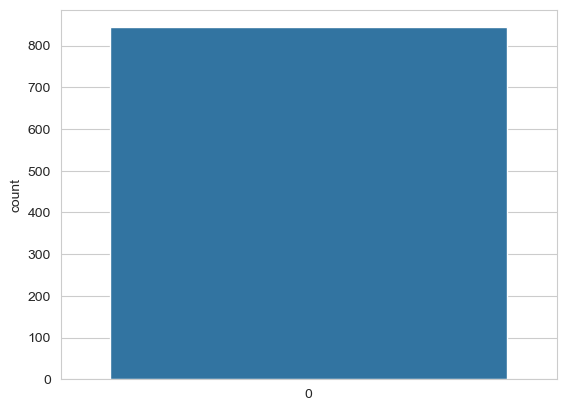

In [56]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

# Spliting Train and Test data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [59]:
x_train.shape

(616, 11)

In [60]:
x_test.shape

(228, 11)

In [61]:
y_train.shape

(616,)

In [62]:
y_test.shape

(228,)

# MODEL BUILDING:

In [63]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# LogisticRegression

In [64]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=4,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6528436018957345


In [65]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6622807017543859
[[69 54]
 [23 82]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       123
           1       0.60      0.78      0.68       105

    accuracy                           0.66       228
   macro avg       0.68      0.67      0.66       228
weighted avg       0.68      0.66      0.66       228

Training accuracy:: 0.6948051948051948
Test accuracy:: 0.6622807017543859


# DECISION TREE CLASSIFIER

In [66]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7322273879966189


In [67]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.6973684210526315
[[85 38]
 [31 74]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       123
           1       0.66      0.70      0.68       105

    accuracy                           0.70       228
   macro avg       0.70      0.70      0.70       228
weighted avg       0.70      0.70      0.70       228

Training accuracy:: 1.0
Test accuracy:: 0.6973684210526315


# KNeighborsClassifier

In [68]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7464567483798252


In [69]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6885964912280702
[[87 36]
 [35 70]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       123
           1       0.66      0.67      0.66       105

    accuracy                           0.69       228
   macro avg       0.69      0.69      0.69       228
weighted avg       0.69      0.69      0.69       228

Training accuracy:: 0.827922077922078
Test accuracy:: 0.6885964912280702


# RandomForestClassifier

In [70]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8258734854888701


In [71]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.7807017543859649
[[91 32]
 [18 87]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       123
           1       0.73      0.83      0.78       105

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.79      0.78      0.78       228

Training accuracy:: 1.0
Test accuracy:: 0.7807017543859649


# ENSEMBLE TECHNIQUES
1.ADA BOOST CLASSIFIER

In [72]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.7550560224089635


In [73]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7543859649122807
[[83 40]
 [16 89]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       123
           1       0.69      0.85      0.76       105

    accuracy                           0.75       228
   macro avg       0.76      0.76      0.75       228
weighted avg       0.77      0.75      0.75       228

Training accuracy:: 0.8133116883116883
Test accuracy:: 0.7543859649122807


2.BAGGING CLASSIFIER

In [74]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.7797759103641456


# 

In [75]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7236842105263158
[[92 31]
 [32 73]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       123
           1       0.70      0.70      0.70       105

    accuracy                           0.72       228
   macro avg       0.72      0.72      0.72       228
weighted avg       0.72      0.72      0.72       228

Training accuracy:: 0.9918831168831169
Test accuracy:: 0.7236842105263158


# 3.Gradient Boosting classifier

In [76]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8084593837535013


In [77]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8026315789473685
[[86 37]
 [ 8 97]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       123
           1       0.72      0.92      0.81       105

    accuracy                           0.80       228
   macro avg       0.82      0.81      0.80       228
weighted avg       0.83      0.80      0.80       228

Training accuracy:: 0.922077922077922
Test accuracy:: 0.8026315789473685
